<center> # Naiwny klasyfikator bayesowski</center>

Celem ćwiczenia jest zapoznanie się z technikami konstrukcji naiwnego klasywikatora bayesowskiego. 

Ćwiczenie oparte jest o artykuł z [linku](https://www.kaggle.com/prashant111/naive-bayes-classifier-in-python/notebook)

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split

Na początku proszę wczytać plik __data.csv__ używając jako separatora ',':

In [2]:
df = pd.read_csv("./data.csv", sep=',')

W następnie sprawdź które z kolumn zawierają dane tekstowe lub liczbowe. W tym celu sprawdź wartość  argumentu *dtype* z odpowiednim warunkiem:

In [3]:
categorical = [var for var in df.columns if df[var].dtype=='O']

print('Dane tektowe zawierają kolumny :\n\n', categorical)

Dane tektowe zawierają kolumny :

 ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']


Sprawdź czy dane w kolumnach nie zawierają braków a jeżeli tak uzupełnij je według znanych Ci metod:

In [4]:
for column in df.columns:
    num_of_nans = df[column].isna().sum()
    if num_of_nans == 0:
        pass
    else:
        print(f"For column '{column}' we have {num_of_nans} NaN values.\n")

columns = [column for column in df.columns if df[column].dtype == object]

for column in columns:
    df[column].replace(" ?", np.nan, inplace=True)
    
df = df.dropna(axis="index", how="any")
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


Na przygotowanych danych przeprowadź proces tworzenia zbiorów uczących i testowych, tak by klasyfikator rozpoznawał do której z grup w kolumnie 'income' należy opisywana osoba


In [5]:
X = df.drop(['income'], axis=1)
y = df["income"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

Przy pomocy biblioteki [category_encoders](https://contrib.scikit-learn.org/category_encoders/) przeprowadź proces kodowania zmiennych tektowych z pozostałych kategorii na wartości liczbowe:

In [6]:
import category_encoders as ce
from sklearn.preprocessing import RobustScaler

encoder = ce.OneHotEncoder(cols=['workclass', 'education', 'marital_status', 'occupation', 'relationship', 
                                 'race', 'sex', 'native_country'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)


cols = X_train.columns

scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])

Używając [GaussianNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html) przeprowadź klasyfikację daych ze zbiorów testowych i treningowych. Podaj dokładnosć modelu i macierz błędu wraz z jej wykresem i interpretacją.

Dokładność modelu: 0.7998
Training-set accuracy score: 0.8032
Training set score: 0.8032
Test set score: 0.7998
              precision    recall  f1-score   support

       <=50K       0.92      0.80      0.86      6764
        >50K       0.57      0.80      0.67      2285

    accuracy                           0.80      9049
   macro avg       0.75      0.80      0.76      9049
weighted avg       0.84      0.80      0.81      9049



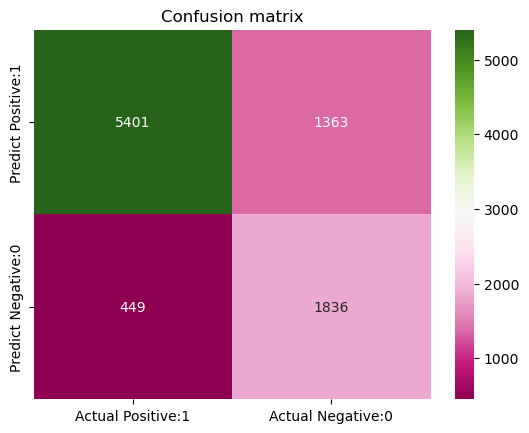

In [7]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, accuracy_score

# instantiate the model
gnb = GaussianNB()

# fit the model
gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)
y_pred_train = gnb.predict(X_train)

print('Dokładność modelu: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

print('Training set score: {:.4f}'.format(gnb.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(gnb.score(X_test, y_test)))

cnf_matrix = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots()
cm_matrix = pd.DataFrame(data=cnf_matrix, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap="PiYG")
plt.title('Confusion matrix')
print(classification_report(y_test, y_pred))

Przprowadź uczenie klasyfikatora dla kolumn *race* i *native_country*. Podaj dokładnosć modeli i macierze błędu wraz z ich wykresami i interpretacją. Przedstaw wnioski od czego zależą otrzymane wyniki

Dokładność modelu: 0.7141
Training-set accuracy score: 0.7094
Training set score: 0.7094
Test set score: 0.7141
                     precision    recall  f1-score   support

 Amer-Indian-Eskimo       0.03      0.01      0.02        82
 Asian-Pac-Islander       0.90      0.55      0.68       270
              Black       0.20      0.49      0.29       878
              Other       0.06      0.22      0.09        69
              White       0.91      0.76      0.83      7750

           accuracy                           0.71      9049
          macro avg       0.42      0.41      0.38      9049
       weighted avg       0.83      0.71      0.76      9049



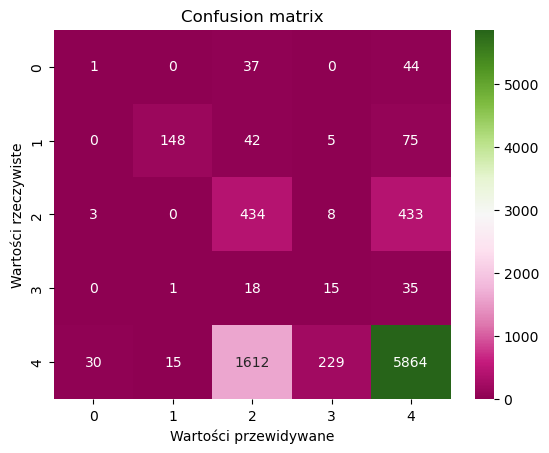

In [8]:
X_without_race = df.drop(['race'], axis=1)
y_race = df["race"]
X_train_wr, X_test_wr, y_train_r, y_test_r = train_test_split(X_without_race, y_race, test_size=0.3, random_state=0)
encoder = ce.OneHotEncoder(cols=['workclass', 'education', 'marital_status', 'occupation', 'relationship', 
                                 'sex', 'native_country', 'income'])

X_train_wr = encoder.fit_transform(X_train_wr)
X_test_wr = encoder.transform(X_test_wr)

cols = X_train_wr.columns

scaler = RobustScaler()
X_train_wr = scaler.fit_transform(X_train_wr)
X_test_wr = scaler.transform(X_test_wr)

X_train_wr = pd.DataFrame(X_train_wr, columns=[cols])
X_test_wr = pd.DataFrame(X_test_wr, columns=[cols])

gnb_wr = GaussianNB()

gnb_wr.fit(X_train_wr, y_train_r)

y_pred_r = gnb_wr.predict(X_test_wr)
y_pred_train_r = gnb_wr.predict(X_train_wr)

gnb_wr.score(X_test_wr, y_test_r)

print('Dokładność modelu: {0:0.4f}'. format(accuracy_score(y_test_r, y_pred_r)))
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train_r, y_pred_train_r)))
print('Training set score: {:.4f}'.format(gnb_wr.score(X_train_wr, y_train_r)))
print('Test set score: {:.4f}'.format(gnb_wr.score(X_test_wr, y_test_r)))

cnf_matrix_wr = confusion_matrix(y_test_r, y_pred_r)
fig, ax = plt.subplots()
cm_matrix = pd.DataFrame(data=cnf_matrix_wr)

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='PiYG')
plt.ylabel('Wartości rzeczywiste')
plt.xlabel('Wartości przewidywane')
plt.title('Confusion matrix')


print(classification_report(y_test_r, y_pred_r))

Dokładność modelu: 0.0443
Training-set accuracy score: 0.0453
Training set score: 0.0453
Test set score: 0.0443


C:\Users\adamz\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\adamz\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\adamz\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\adamz\anaconda3\lib\site-packages\sklearn\metrics\_cla

                             precision    recall  f1-score   support

                   Cambodia       0.00      0.00      0.00         2
                     Canada       0.00      0.00      0.00        40
                      China       1.00      0.10      0.17        21
                   Columbia       0.00      0.00      0.00        21
                       Cuba       0.00      0.00      0.00        36
         Dominican-Republic       0.02      0.43      0.03        23
                    Ecuador       0.00      0.00      0.00        11
                El-Salvador       0.00      0.00      0.00        29
                    England       0.00      0.00      0.00        25
                     France       0.00      0.00      0.00         8
                    Germany       0.00      0.00      0.00        36
                     Greece       0.00      0.00      0.00         5
                  Guatemala       0.00      0.00      0.00        20
                      Haiti      

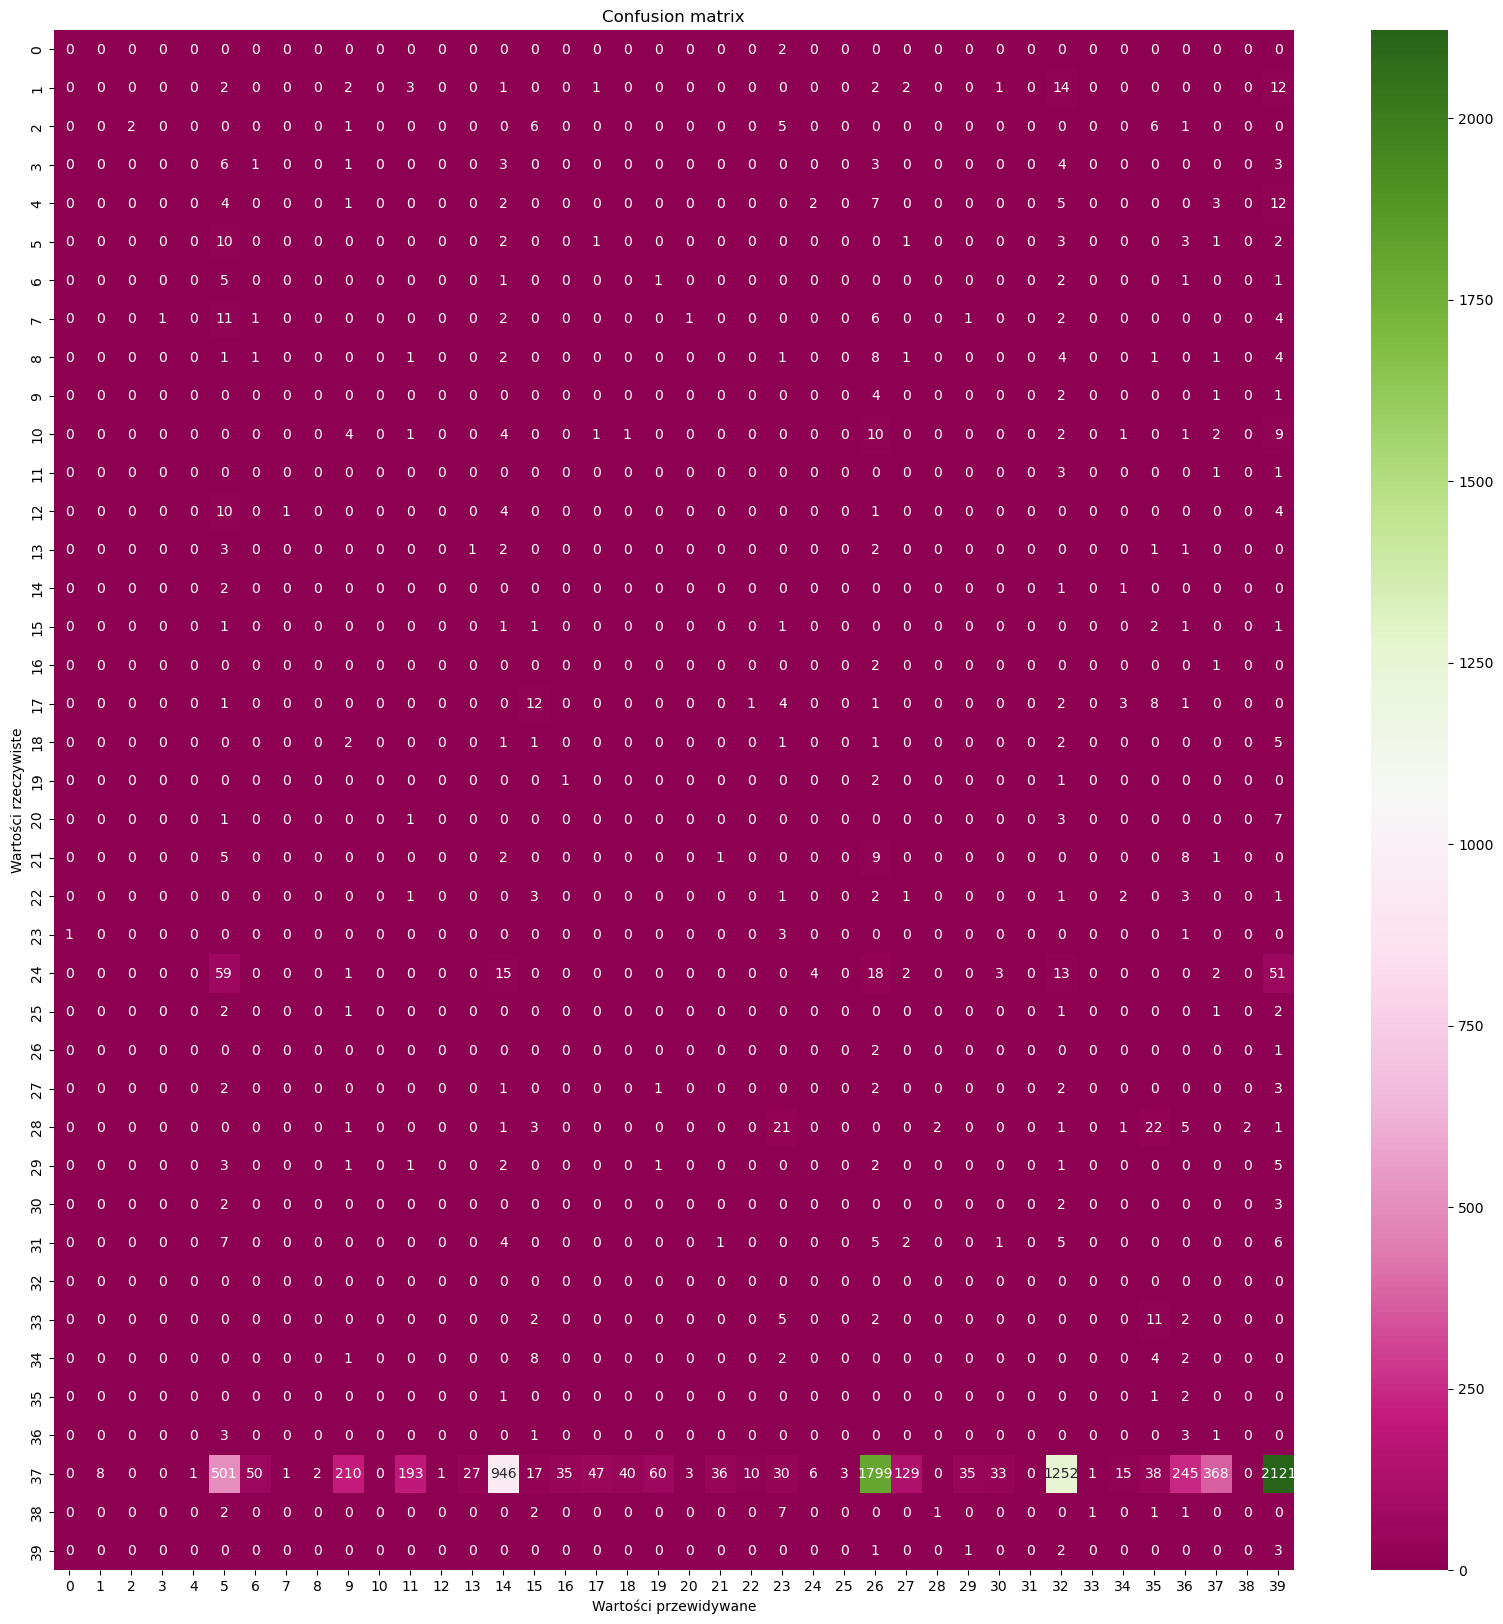

In [9]:
X_without_native_country = df.drop(['native_country'], axis=1)
y_native_country = df["native_country"]

X_train_nc, X_test_nc, y_train_nc, y_test_nc = train_test_split(X_without_native_country, y_native_country, test_size=0.3, random_state=0)
encoder = ce.OneHotEncoder(cols=['workclass', 'education', 'marital_status', 'occupation', 'relationship', 
                                 'race', 'sex', 'income'])

X_train_nc = encoder.fit_transform(X_train_nc)
X_test_nc = encoder.transform(X_test_nc)

cols = X_train_nc.columns

scaler = RobustScaler()
X_train_nc = scaler.fit_transform(X_train_nc)
X_test_nc = scaler.transform(X_test_nc)

X_train_nc = pd.DataFrame(X_train_nc, columns=[cols])
X_test_nc = pd.DataFrame(X_test_nc, columns=[cols])

gnb_nc = GaussianNB()

gnb_nc.fit(X_train_nc, y_train_nc)

y_pred_nc = gnb_nc.predict(X_test_nc)
y_pred_train_nc = gnb_nc.predict(X_train_nc)

gnb_nc.score(X_test_nc, y_test_nc)

print('Dokładność modelu: {0:0.4f}'. format(accuracy_score(y_test_nc, y_pred_nc)))
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train_nc, y_pred_train_nc)))
print('Training set score: {:.4f}'.format(gnb_nc.score(X_train_nc, y_train_nc)))
print('Test set score: {:.4f}'.format(gnb_nc.score(X_test_nc, y_test_nc)))

cnf_matrix_nc = confusion_matrix(y_test_nc, y_pred_nc)
fig, ax = plt.subplots(figsize=(20, 20))
cm_matrix = pd.DataFrame(data=cnf_matrix_nc)

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='PiYG')
plt.ylabel('Wartości rzeczywiste')
plt.xlabel('Wartości przewidywane')
plt.title('Confusion matrix')


print(classification_report(y_test_nc, y_pred_nc))

Im więcej wartości zawiera klasyfikator tym mniej dokładny jest model.